In [91]:
from tests.heat_eqn.save_experiments import ExperimentData
from tests.heat_eqn.rescale_solutions import load_rescaled_data
# from tests.heat_eqn.plotting import (plot_1d_evolution_periodic_bc,
#                                      plot_1d_evolution_zero_bc,
#                                      add_time_color_bar,
#                                      add_text,
#                                      plot_stat_figures,
#                                      time_colormap
#                                      )
from tests.heat_eqn.plotting import *

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Solutions to 1D Heat Equation

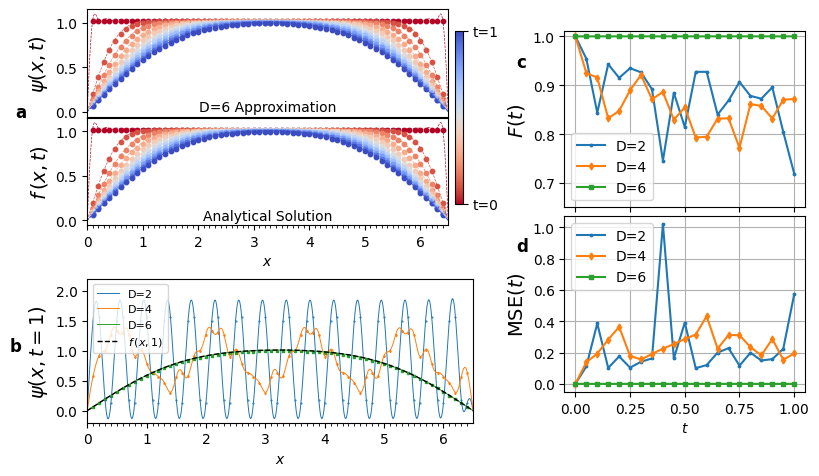

In [426]:
expt_data = load_rescaled_data('data/heat_eqn/alpha=0.8/', '6 qubit square wave alpha=0.8', 20)
# Nt = np.int32(np.ceil(expt_data.T/expt_data.dt))
# Nx = expt_data.f0.shape[0]
Nd,Nt,Nx = expt_data.qite_sols.shape
expt_data.periodic_bc_flag
a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 1/2.5
tsplit = 20
time_slice = slice(0,Nt+tsplit, Nt//tsplit)

figure = plt.figure(figsize=(a4_width,fig_height_ratio*a4_height))

sol_fig, stat_fig = figure.subfigures(1, 2, width_ratios=[1.5,1], wspace=0.0)

evo_fig, d_fig = sol_fig.subfigures(2,1, height_ratios=[1.5,1])

evo_axs = evo_fig.subplots(2,1,sharex=True)
d_ax = d_fig.subplots(1)
stat_axs = stat_fig.subplots(2,1,sharex=True)

if not expt_data.periodic_bc_flag:
    plot_1d_evolution_zero_bc(evo_axs[0], 
                          expt_data.f0,
                          expt_data.qite_sols[-1],
                          (np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx))*expt_data.dx,
                          expt_data.dx, expt_data.L,
                          times:=np.arange(0,Nt+1)*expt_data.dt,
                          plot_times:=np.arange(0,Nt+1,(Nt+1)//10))
    plot_1d_evolution_zero_bc(evo_axs[1], 
                          expt_data.f0,
                          expt_data.analytical_sol,
                          (np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx))*expt_data.dx,
                          expt_data.dx, expt_data.L,
                          times, plot_times)
else:
    plot_1d_evolution_periodic_bc(evo_axs[0], 
                          expt_data.f0,
                          expt_data.qite_sols[-1],
                          (np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx))*expt_data.dx,
                          expt_data.dx, expt_data.L,
                          times:=np.arange(0,Nt+1)*expt_data.dt,
                          plot_times:=np.arange(0,Nt+1,(Nt+1)//10))
    plot_1d_evolution_periodic_bc(evo_axs[1], 
                          expt_data.f0,
                          expt_data.analytical_sol,
                          (np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx))*expt_data.dx,
                          expt_data.dx, expt_data.L,
                          times, plot_times)
add_text(evo_axs[0],0.5,0.05,f'D={expt_data.D_list[-1]} Approximation',size=10,horizontalalignment='center')
add_text(evo_axs[1],0.5,0.05,f'Analytical Solution',size=10,horizontalalignment='center')

cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,expt_data.T), cmap=time_colormap),
             ax=evo_axs.ravel().tolist(),
             location='right',orientation='vertical',
             shrink=0.8,aspect=20,anchor=(0.8,0.5))
cb.set_ticks([0,expt_data.T])
cb.set_ticklabels(['t=0', 't=1'])

xrange =(np.arange(1,Nx+1) if not expt_data.periodic_bc_flag else np.arange(Nx) )*expt_data.dx
dense_x = np.arange(0,expt_data.L+expt_data.dx/10,expt_data.dx/10)

for Di,D in enumerate(expt_data.D_list):
    qsol = expt_data.qite_sols[Di][-1]
    
    if not expt_data.periodic_bc_flag:
        iqsol = get_zero_bc_interpolation(qsol, dense_x, expt_data.dx, expt_data.L)
    else:
        iqsol = get_periodic_bc_interpolation(qsol, dense_x, expt_data.dx, expt_data.L)
    l, = d_ax.plot(dense_x, iqsol, label=f'{D=}', linewidth=0.7, alpha=1.0)
    d_ax.scatter(xrange,qsol, marker=plt_markers[Di], color=l.get_color(), s=1.0)
asol = expt_data.analytical_sol[-1]
if not expt_data.periodic_bc_flag:
    iasol = get_zero_bc_interpolation(asol, dense_x, expt_data.dx, expt_data.L)
else:
    iasol = get_periodic_bc_interpolation(asol, dense_x, expt_data.dx, expt_data.L)
d_ax.plot(dense_x, iasol, label='$f\,(x,1)$', linewidth=1.0, linestyle='--', color='k')

for Di,D in enumerate(expt_data.D_list):
    stat_axs[0].plot(times[time_slice], expt_data.stat_data[0,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')
    stat_axs[1].plot(times[time_slice], expt_data.stat_data[2,Di,time_slice],marker=plt_markers[Di],markersize=3.5, label=f'{D=}')

d_ax.legend(fontsize=8, loc='upper left')
stat_axs[0].legend(loc='lower left')#, fancybox=True, shadow=True)
stat_axs[1].legend(loc='upper left')#, fancybox=True, shadow=True)

stat_axs[0].grid(True)
stat_axs[1].grid(True)

evo_axs[0].set_xlim([0.0,expt_data.L])
evo_axs[0].set_xticks(np.arange(0,expt_data.L,expt_data.dx),minor=True)
d_ax.set_xlim([0.0, expt_data.L])
d_ax.set_xticks(np.arange(0,expt_data.L,expt_data.dx),minor=True)
d_ax.set_ylim([-0.2, 2.2])

stat_axs[0].set_ylim([0.65,1.01])

evo_axs[0].set_ylabel(r'$\psi(x,t)$', fontsize=14)
evo_axs[1].set_ylabel(r'$f\,(x,t)$', fontsize=14)
d_ax.set_ylabel(r'$\psi(x,t=1)$', fontsize=14)

stat_axs[0].set_ylabel(r'$F(t)$', fontsize=14)
stat_axs[1].set_ylabel(r'MSE$(t)$', fontsize=14)

evo_axs[-1].set_xlabel(r'$x$')
d_ax.set_xlabel(r'$x$')
# stat_axs[0].set_xlabel('$t$')
stat_axs[1].set_xlabel('$t$')

evo_fig.subplots_adjust(hspace=0.01,right=0.85)
stat_fig.subplots_adjust(hspace=0.05)#,top=0.75,bottom=0.25,wspace=0.5)

add_text(evo_axs[0], -0.2, 0.0, 'a', weight='bold')
add_text(d_ax, -0.2, 0.5, 'b', weight='bold')
add_text(stat_axs[0], -0.2, 0.8, 'c', weight='bold')
add_text(stat_axs[1], -0.2, 0.8, 'd', weight='bold')

figpath = 'figs/heat_eqn/paper_figs/'
figname = 'square_wave'
plt.savefig(figpath+figname+'.svg',dpi=300, bbox_inches='tight')
plt.savefig(figpath+figname+'.png',dpi=300, bbox_inches='tight')

plt.show()

# Effect of K on log norm ratio

In [260]:
import h5py

log_ratios = np.zeros((6,3,1001),np.float64)

Ks = [1,20,50,100,200]

with h5py.File('data/heat_eqn/alpha=0.8/6 qubit square wave alpha=0.8.hdf5') as file:
    log_ratios[0][:] = -file['stats/log_norm_ratio'][:]
    for ki,K in enumerate(Ks):
        log_ratios[ki+1][:] = file[f'stats/rescaled_stats/{K=}/log_norm_ratio'][:]

In [338]:
log_ratios.shape

(6, 3, 1001)

In [339]:
time_slice

slice(0, 1001, 50)

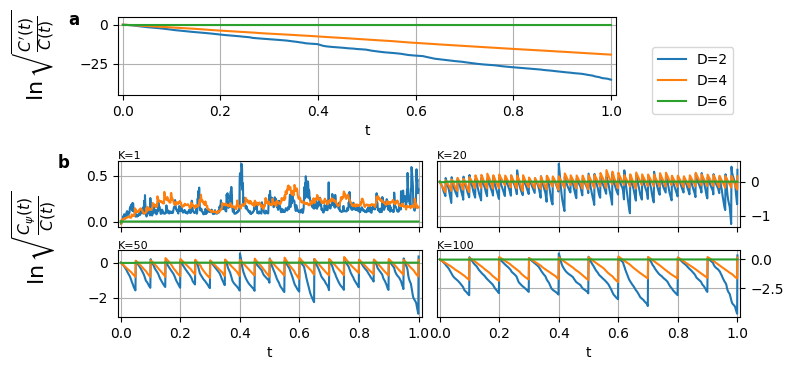

In [430]:


a4_width  = 8.3
a4_height = 11.7
fig_height_ratio = 1/3.5

figure = plt.figure(figsize=(a4_width,fig_height_ratio*a4_height))

topFig,bottomFig = figure.subfigures(2,1,height_ratios=[1,2],hspace=0.2)

time_slice = slice(0,1001,1)

t_ax = topFig.subplots(1)
for Di,D in enumerate([2,4,6]):
    t_ax.plot(times[time_slice],log_ratios[0,Di][time_slice], label=f'{D=}')#, marker=plt_markers[Di], ms=3)
# ax.set_ylabel(r'$\ln \frac{C^\prime(t)}{C(t)}$')
t_ax.set_xlabel('t')
t_ax.set_ylim([-45,5])
t_ax.grid(True)

axs = bottomFig.subplots(2,2,sharex=True)
for i,ax in enumerate(axs.flatten()):
    for Di,D in enumerate([2,4,6]):
        ax.plot(times[time_slice], log_ratios[i+1,Di,time_slice])#, marker=plt_markers[Di], ms=3)
        if i%2 == 1:
            # ax.yaxis.set_label_position('right')
            ax.yaxis.tick_right()
        ax.set_title(f'K={Ks[i]}',fontsize=8,loc='left',y=0.9)
        ax.grid(True)
axs[1,0].set_xlabel('t')
axs[1,1].set_xlabel('t')

# figure.subplots_adjust(hspace=0.1, wspace=0.25)
topFig.subplots_adjust(left=0.15,right=0.75)
bottomFig.subplots_adjust(left=0.15,right=0.9,hspace=0.35, wspace=0.05)

topFig.supylabel(r'$\ln \sqrt{\frac{C^\prime(t)}{C(t)}}$', fontsize=16)
bottomFig.supylabel(r'$\ln \sqrt{\frac{C_\psi(t)}{C(t)}}$', fontsize=16)

topFig.legend(bbox_to_anchor=(0.9,0.65))

add_text(t_ax, -0.1, 0.9, 'a', weight='bold')
add_text(axs[0,0],-0.2, 0.9, 'b', weight='bold')

t_ax.set_xlim([-0.01,1.01])
axs[0,0].set_xlim([-0.01,1.01])

figname='K_effect'
plt.savefig(figpath+figname+'.svg', dpi=300, bbox_inches='tight')
plt.savefig(figpath+figname+'.png', dpi=300, bbox_inches='tight')

plt.show()